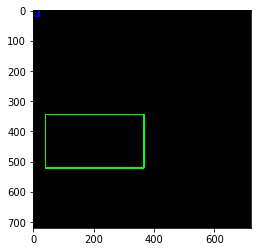

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

blank = np.zeros((720,720,3), np.uint8)
cv2.rectangle(blank,(-50,-20),(20,80),(255, 140, 0),3)
cv2.rectangle(blank,(366,345),(40,522),(0,255,0),3)
# cv2.imshow('test',blank)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# ax1 = plt.subplot(111)
# ax1.set_figheight(720)
# ax1.set_figwidth(720)
# im1 = ax1.imshow(blank)
plt.ion()
# im1.set_data(blank)
plt.pause(0.001)
plt.draw()
plt.imshow(blank)

In [16]:
path = r'/multiverse/datasets/shared/DTLD/Berlin/Berlin4/2015-04-17_14-27-00/DE_BBBR667_2015-04-17_14-27-06-035828_k0.tiff'
img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
print(img)

[[2240 2345 2256 ... 2567 2566 2561]
 [2573 2232 2575 ... 2585 2584 2523]
 [2143 2280 2184 ... 2571 2573 2561]
 ...
 [ 393  396  418 ...  356  412  372]
 [ 388  320  368 ...  320  368  315]
 [ 387  380  405 ...  336  393  372]]


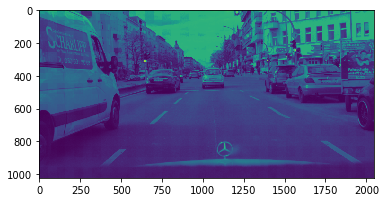

In [17]:
plt.imshow(img)

# LABEL CHECK

In [ ]:
#                     "h": 62, 
#                     "track_id": "Trafficlight_1", 
#                     "unique_id": 23847, 
#                     "w": 18, 
#                     "x": 487, 
#                     "y": 206

#                     "h": 56, 
#                     "track_id": "Trafficlight_2", 
#                     "unique_id": 23848, 
#                     "w": 15, 
#                     "x": 512, 
#                     "y": 3

#                     "h": 33, 
#                     "track_id": "Trafficlight_10", 
#                     "unique_id": 23855, 
#                     "w": 6, 
#                     "x": 1659, 
#                     "y": 275
path = r'/multiverse/datasets/shared/DTLD/Berlin/Berlin4/2015-04-17_14-13-11/DE_BBBR667_2015-04-17_14-13-14-174970_k0.tiff'
img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BAYER_GB2RGB)
#     Images are saved in 12 bit raw -> shift 4 bits
img = np.right_shift(img, 4)
img = img.astype(np.uint8)

x = 512
y = 3
w = 15
h = 56

xr = 1659
yr = 275
wr = 6
hr = 33

img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 3)
img = cv2.rectangle(img, (xr, yr), (xr+wr, yr+hr), (255, 255, 255), 3)

dpi = matplotlib.rcParams['figure.dpi']
height = 1024
width = 2048

# What size does the figure need to be in inches to fit the image?
figsize = width / float(100), height / float(100)
#     figsize = width, height

# Create a figure of the right size with one axes that takes up the full figure
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])

# Hide spines, ticks, etc.
ax.axis('off')

# Display the image.
ax.imshow(img)

plt.show()
cv2.imwrite('/multiverse/datasets/shared/DTLD/test' + '_left_bulb.tiff', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))


In [ ]:
path = r'/multiverse/datasets/shared/DTLD/Berlin/Berlin4/2015-04-17_14-27-00/DE_BBBR667_2015-04-17_14-27-06-035828_k0.tiff'
img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BAYER_GB2BGR)
img = img[:, :, ::-1].transpose(2, 0, 1)
# Images are saved in 12 bit raw -> shift 4 bits
img = np.right_shift(img, 4)
# img = img.astype(np.uint8)
# cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 5)

plt.imshow(img)


In [26]:
import os 
os.path.splitext('/multiverse/datasets/shared/DTLD/Berlin/Berlin4/2015-04-17_14-27-00/DE_BBBR667_2015-04-17_14-27-06-035828_k0.tiff')

('/multiverse/datasets/shared/DTLD/Berlin/Berlin4/2015-04-17_14-27-00/DE_BBBR667_2015-04-17_14-27-06-035828_k0',
 '.tiff')

In [ ]:
%matplotlib inline 
import matplotlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_image_in_actual_size(im_path):

    dpi = matplotlib.rcParams['figure.dpi']
    img = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)  
    img = cv2.cvtColor(img, cv2.COLOR_BAYER_GB2RGB)
#     Images are saved in 12 bit raw -> shift 4 bits
    img = np.right_shift(img, 4)
    img = img.astype(np.uint8)
        
    dw = 2048
    dh = 1024
    
    txt_path = im_path[:-4] + 'txt'
    label_file = open(txt_path, 'r')
    labels = label_file.read().split('\n')
    labels.pop(-1)
    for label in labels:
        xnorm = float(label.split(' ')[1])
        ynorm = float(label.split(' ')[2])
        wnorm = float(label.split(' ')[3])
        hnorm = float(label.split(' ')[4])
        xc = xnorm - wnorm/2
        yc = ynorm - hnorm/2
        x = int(xc*dw)
        y = int(yc*dh)
        w = int(wnorm*dw)
        h = int(hnorm*dh)
    
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 2)  
   
#     height, width, depth = im_data.shape
    height = 1024
    width = 2048

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)
#     figsize = width, height

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img)

    plt.show()

# path = r'/multiverse/datasets/shared/DTLD/Berlin/Berlin4/2015-04-17_14-27-00/DE_BBBR667_2015-04-17_14-27-06-035828_k0.tiff'
# path2 = r'/multiverse/datasets/shared/DTLD/Kassel/Kassel3/2015-05-15_15-27-10/DE_BBBR667_2015-05-15_15-27-17-702448_k0.tiff'
# pathduss = r'/multiverse/datasets/shared/DTLD/Duesseldorf/Duesseldorf1/2015-04-22_13-21-48/DE_BBBR667_2015-04-22_13-21-50-403002_k0.tiff'
# # pathtest = r'/multiverse/storage/simsek/dtld_test/output/DE_BBBR667_2015-04-17_10-50-18-299982_k0.tiff'
# pathber = r'/multiverse/datasets/shared/DTLD/Berlin/Berlin1/2015-04-17_10-50-05/DE_BBBR667_2015-04-17_10-50-13-633939_k0.tiff'
# display_image_in_actual_size(pathduss)

from IPython.display import clear_output

test_path = '/multiverse/datasets/shared/DTLD/train.txt'
test_file = open(test_path, 'r')
test_imgs = test_file.read().split('\n')
test_imgs.pop(-1)
for img in test_imgs:
    display_image_in_actual_size(img)
    _ = input("Press [enter] to continue.")
    clear_output()





In [17]:
import matplotlib

def display_test_in_actual_size(im_path):

    dpi = matplotlib.rcParams['figure.dpi']
    img = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     height, width, depth = im_data.shape
    height = 1024
    width = 2048

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)
#     figsize = width, height

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img)

    plt.show()

In [ ]:
%matplotlib inline
import glob
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np

plt.ion() # turn on interactive mode
img_list = glob.glob('/multiverse/storage/simsek/inference/output/*.tiff')
for img_path in img_list:
    print(img_path)
    display_test_in_actual_size(img_path)

    _ = input("Press [enter] to continue.")
    clear_output()

In [ ]:
display_test_in_actual_size('/multiverse/datasets/shared/DTLD/Berlin/Berlin1/2015-04-17_10-50-05/DE_BBBR667_2015-04-17_10-50-13-633939_k0.tiff')

In [ ]:
import cv2
import matplotlib.pyplot as plt
vid_capture = cv2.VideoCapture('/multiverse/datasets/shared/DTLD/2mincropped.mp4')

# Create a video capture object, in this case we are reading the video from a file


if (vid_capture.isOpened() == False):
    print("Error opening the video file")
    # Read fps and frame count
else:
    # Get frame rate information
    # You can replace 5 with CAP_PROP_FPS as well, they are enumerations
    fps = vid_capture.get(5)
    print('Frames per second : ', fps,'FPS')

    # Get frame count
    # You can replace 7 with CAP_PROP_FRAME_COUNT as well, they are enumerations
    frame_count = vid_capture.get(7)
    print('Frame count : ', frame_count)

while(vid_capture.isOpened()):
    # vid_capture.read() methods returns a tuple, first element is a bool 
    # and the second is frame
    ret, frame = vid_capture.read()
    if ret == True:
#         cv2.imshow('Frame',frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        # 20 is in milliseconds, try to increase the value, say 50 and observe
        key = cv2.waitKey(3600)
        
        if key == ord('q'):
            break
    else:
        break

# Release the video capture object
vid_capture.release()
cv2.destroyAllWindows()


# TEST FOLDER AND COPYING IMAGES

In [8]:
import os
import shutil

test_path = '/multiverse/datasets/shared/DTLD/test_folder'

if not os.path.exists(test_path):
    os.makedirs(test_path)

img_file = open('/multiverse/datasets/shared/DTLD/test.txt','r')
img_paths = img_file.read().split('\n')

for img in img_paths:
    if img:
        text = img[:-4] + 'txt'
        new_path = test_path + '/' + img.split('/')[-1]
        text_path = test_path + '/' + img.split('/')[-1]
        shutil.copyfile(img, new_path)

In [11]:
print(img_paths[-2])
img = img_paths[-2]

/multiverse/datasets/shared/DTLD/Koeln/Koeln5/2015-04-23_16-35-22/DE_BBBR667_2015-04-23_16-36-48-779719_k0.tiff


In [12]:
text = img[:-4] + 'txt'
print(text)

/multiverse/datasets/shared/DTLD/Koeln/Koeln5/2015-04-23_16-35-22/DE_BBBR667_2015-04-23_16-36-48-779719_k0.txt


In [15]:
text_path = test_path + '/' + img.split('/')[-1][:-4] + 'txt'

In [16]:
print(text_path)

/multiverse/datasets/shared/DTLD/test_folder/DE_BBBR667_2015-04-23_16-36-48-779719_k0.txt


# RANDOM IMAGE SELECTION AND MINI FOLDER CREATION

In [ ]:
import os
import random
import glob
import shutil

img_list = glob.glob('/multiverse/datasets/shared/DTLD/test_folder_10px/*.tiff')
print(len(img_list))
random_images = random.choices(img_list, k=100)
print(random_images)

test_mini_folder = '/multiverse/datasets/shared/DTLD/test_100_folder/'
if os.path.exists(test_mini_folder):
    os.remove(test_mini_folder)

if not os.path.exists(test_mini_folder):
    os.makedirs(test_mini_folder)

for img in random_images:
    text = img[:-4] + 'txt'
    shutil.copy(img, test_mini_folder)
    shutil.copy(text, test_mini_folder)
    

# LABEL SHOW


In [16]:
import matplotlib
import cv2
%matplotlib inline
import glob
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import os

def display_test_with_labels_in_actual_size(im_path):

#     dpi = matplotlib.rcParams['figure.dpi']
    img = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)  
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = cv2.cvtColor(img, cv2.COLOR_BAYER_GB2RGB)
#     Images are saved in 12 bit raw -> shift 4 bits
    img = np.right_shift(img, 4)
    img = img.astype(np.uint8)
    
#     dw = 2048
#     dh = 1024
#     txt_folder = '/multiverse/datasets/shared/DTLD/testing/bulb_100/'
#     im_name = im_path.split('/')[-1]
#     txt_path = txt_folder + im_name[:-4] + 'txt'
#     label_file = open(txt_path, 'r')
#     labels = label_file.read().split('\n')
#     labels.pop(-1)
#     for label in labels:
#         state = label.split(' ')[0]
#         xnorm = float(label.split(' ')[1])
#         ynorm = float(label.split(' ')[2])
#         wnorm = float(label.split(' ')[3])
#         hnorm = float(label.split(' ')[4])
#         xc = xnorm - wnorm/2
#         yc = ynorm - hnorm/2
#         x = int(xc*dw)
#         y = int(yc*dh)
#         w = int(wnorm*dw)
#         h = int(hnorm*dh)
#         cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 1)
        
        
#         if state == '0':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 1)
#         elif state == '1':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 1)
#         elif state == '2':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 1)
#         elif state == '3':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (255, 140, 0), 1)
#         elif state == '4':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)   
         
#     height, width, depth = im_data.shape
#     height = 1024
#     width = 2048
#     # What size does the figure need to be in inches to fit the image?
#     figsize = width / float(dpi), height / float(dpi)
# #     figsize = width, height
#     # Create a figure of the right size with one axes that takes up the full figure
#     fig = plt.figure(figsize=figsize)
#     ax = fig.add_axes([0, 0, 1, 1])
#     # Hide spines, ticks, etc.
#     ax.axis('off')
#     # Display the image.
# #     ax.imshow(img)
# #     plt.show()
    
    save_path = '/multiverse/datasets/shared/DTLD/testing/bulb_100_rgb/'
    if not os.path.exists(save_path):
        os.makedirs(save_path)
        
    im_path_split = im_path.split('/')
    save_path = save_path + im_path_split[-1]

    cv2.imwrite(save_path[:-5] + '_labeled.tiff', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
#     cv2.imwrite(save_path[:-5] + '_labeled.tiff', img)    

In [17]:
plt.ion() # turn on interactive mode
img_list = glob.glob('/multiverse/datasets/shared/DTLD/testing/bulb_100/*.tiff')

# img_list = glob.glob('/multiverse/datasets/shared/DTLD/**/**/**/*.tiff')

for img_path in img_list:
    print(img_path)
    display_test_with_labels_in_actual_size(img_path)

#     _ = input("Press [enter] to continue.")
#     clear_output()


/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-22_16-31-39-791703_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-17_14-14-20-440408_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-21_14-45-46-069763_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-21_11-29-38-880580_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-20_11-51-21-345867_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-20_11-32-07-420236_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-20_11-55-40-276063_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-17_14-14-24-440596_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-22_15-57-59-207928_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-22_17-17-58-906302_k0.tiff
/multiverse/datasets/shared/DTLD/testing

/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-24_18-45-58-573102_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-20_17-12-26-905635_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-20_16-53-04-114115_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-21_12-02-26-877674_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-23_13-05-48-425056_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-21_11-56-45-607455_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-23_13-20-22-406476_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-05-15_18-02-58-637411_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-21_14-31-30-274571_k0.tiff
/multiverse/datasets/shared/DTLD/testing/bulb_100/DE_BBBR667_2015-04-21_15-09-00-859089_k0.tiff
/multiverse/datasets/shared/DTLD/testing

In [18]:
import matplotlib
import cv2
%matplotlib inline
import glob
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import os

def display_bulb_dir(im_path):

    dpi = matplotlib.rcParams['figure.dpi']
    img = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     img = cv2.cvtColor(img, cv2.COLOR_BAYER_GB2RGB)
# #     Images are saved in 12 bit raw -> shift 4 bits
#     img = np.right_shift(img, 4)
#     img = img.astype(np.uint8)
    
    dw = 2048
    dh = 1024
    
    txt_path = im_path[:-5] + '_bulb.txt'
    label_file = open(txt_path, 'r')
    labels = label_file.read().split('\n')
    labels.pop(-1)
    xprev = 0
    state_dict = {'0': 'B1', '1': 'B2', '2': 'B3', '3': 'F', '4': 'B', '5': 'R', '6': 'L'}
    
    for label in labels:
        state = label.split(' ')[0]
        xnorm = float(label.split(' ')[1])
        ynorm = float(label.split(' ')[2])
        wnorm = float(label.split(' ')[3])
        hnorm = float(label.split(' ')[4])
        xc = xnorm - wnorm/2
        yc = ynorm - hnorm/2
        x = int(xc*dw)
        y = int(yc*dh)
        w = int(wnorm*dw)
        h = int(hnorm*dh)
        if x == xprev:            
            cv2.putText(img, state_dict[state], (x-20, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2 )
            continue
        xprev = x
        
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
        cv2.putText(img, state_dict[state], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)
        
        
#         if state == '0':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, '1B', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '1':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, '2B', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '2':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, '3B', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '3':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, 'F', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '4':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, 'B', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '5':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, 'R', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '6':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, 'L', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

#     height, width, depth = im_data.shape
    height = 1024
    width = 2048
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)
#     figsize = width, height
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    # Hide spines, ticks, etc.
    ax.axis('off')
    # Display the image.
#     ax.imshow(img)
#     plt.show()
   
#     save_path = '~/storage/detect_100/yolor'
#     if not os.path.exists(save_path):
#         os.makedirs(save_path)
        
#     im_path_split = im_path.split('/')
#     save_path = save_path + im_path_split[-1]
#     cv2.imwrite(save_path[:-5] + '_labeled.tiff', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [ ]:
plt.ion() # turn on interactive mode
img_list = glob.glob('/multiverse/storage/simsek/yolor/runs/detect/new_annot_100_test_all_2048/*.tiff')
# img_list = glob.glob('/multiverse/datasets/shared/DTLD/**/**/**/*.tiff')

for img_path in img_list:
    print(img_path)
    display_test_with_labels_in_actual_size(img_path)

#     _ = input("Press [enter] to continue.")
#     clear_output()


# LABEL SHOW BULB TRAIN

In [4]:
import matplotlib
import cv2
%matplotlib inline
import glob
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import os

def display_bulb_dir(im_path):

    dpi = matplotlib.rcParams['figure.dpi']
    img = cv2.imread(im_path, cv2.IMREAD_UNCHANGED)  
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = cv2.cvtColor(img, cv2.COLOR_BAYER_GB2RGB)
#     Images are saved in 12 bit raw -> shift 4 bits
    img = np.right_shift(img, 4)
    img = img.astype(np.uint8)
    
    dw = 2048
    dh = 1024
    
    txt_path = im_path[:-4] + 'txt'
    label_file = open(txt_path, 'r')
    labels = label_file.read().split('\n')
    labels.pop(-1)
    xprev = 0
    state_dict = {'0': 'B1', '1': 'B2', '2': 'B3', '3': 'F', '4': 'B', '5': 'R', '6': 'L'}
    
    for label in labels:
        state = label.split(' ')[0]
        xnorm = float(label.split(' ')[1])
        ynorm = float(label.split(' ')[2])
        wnorm = float(label.split(' ')[3])
        hnorm = float(label.split(' ')[4])
        xc = xnorm - wnorm/2
        yc = ynorm - hnorm/2
        x = int(xc*dw)
        y = int(yc*dh)
        w = int(wnorm*dw)
        h = int(hnorm*dh)
        if x == xprev:            
            cv2.putText(img, state_dict[state], (x-20, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2 )
            continue
        xprev = x
        
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
        cv2.putText(img, state_dict[state], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)
        
        
#         if state == '0':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, '1B', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '1':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, '2B', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '2':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, '3B', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '3':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, 'F', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '4':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, 'B', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '5':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, 'R', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
#         elif state == '6':
#             cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
#             cv2.putText(img, 'L', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

#     height, width, depth = im_data.shape
    height = 1024
    width = 2048
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)
#     figsize = width, height
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    # Hide spines, ticks, etc.
    ax.axis('off')
    # Display the image.
    ax.imshow(img)
    plt.show()
   
#     save_path = '~/storage/detect_100/yolor'
#     if not os.path.exists(save_path):
#         os.makedirs(save_path)
        
#     im_path_split = im_path.split('/')
#     save_path = save_path + im_path_split[-1]
#     cv2.imwrite(save_path[:-5] + '_labeled.tiff', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

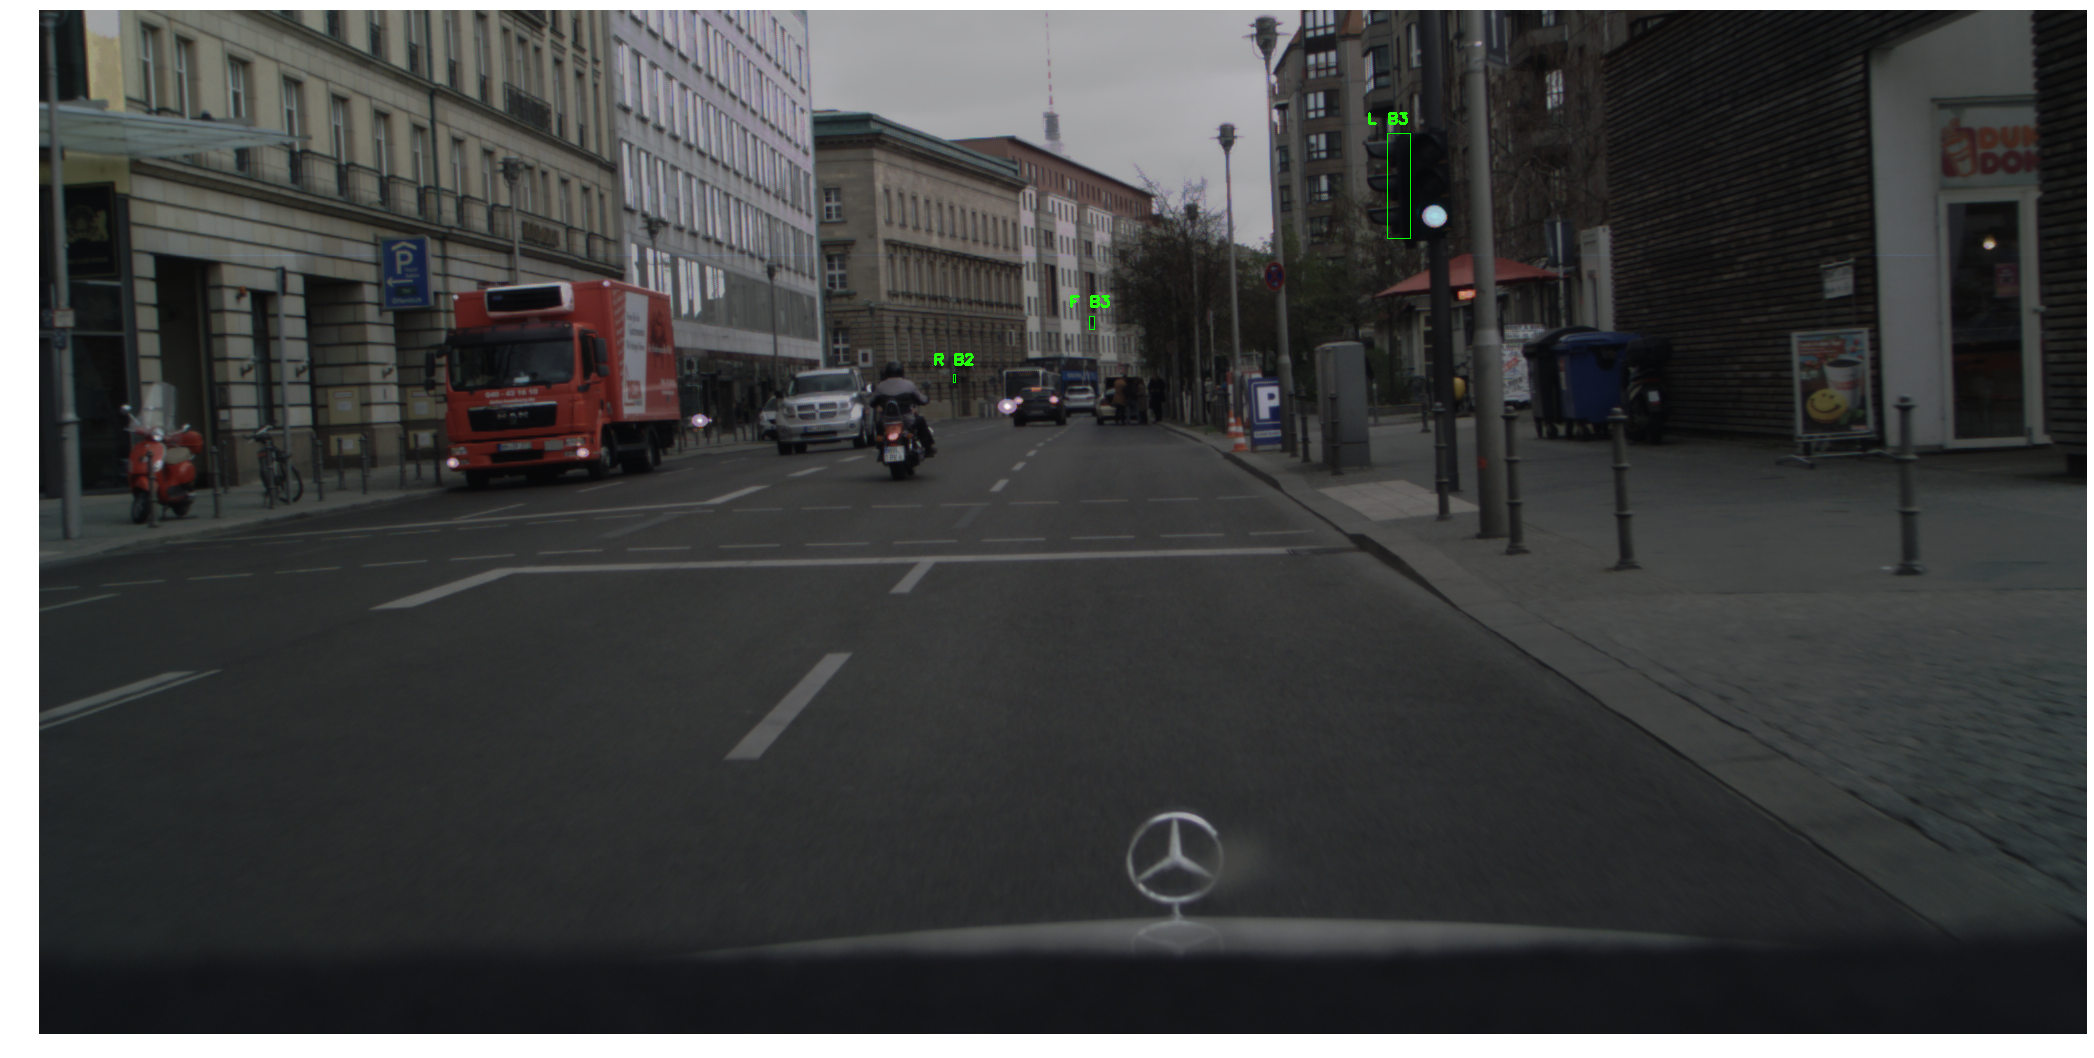

In [6]:
img_path = '/multiverse/datasets/shared/DTLD/Berlin/Berlin1/2015-04-17_10-59-54/DE_BBBR667_2015-04-17_11-00-00-099771_k0.tiff'
display_bulb_dir(img_path)